## Mortgage Calculator
By Yinlong Thatiynantaporn

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Calculate How much you have to pay monthly without the property tax
def mPay(Loan,month_Interest_Rate,n): 
    Pay = (Loan*month_Interest_Rate*(1+month_Interest_Rate)**(n))/((1+month_Interest_Rate)**(n)-1)
    return Pay 

In [3]:
#Calculate Actual Monthly Interest
def mInterest(Loan,month_Interest_Rate,n): 
    month_Pay = mPay(Loan,month_Interest_Rate,n)
    Interest = np.zeros(int(n))

    for i in range(0,int(n),1):
        Interest[i] = Loan*month_Interest_Rate
        Loan = Loan - (month_Pay - Interest[i]) 

    return Interest 

In [6]:
""""
USD 
- No homeowners insurance
- NYC Rate
"""
#Parameter Setting

#House = 500000.0                     
House = float(input("Property Price :"))
#Down = 125000.0                    
Down = float(input("Down Payment :"))
Loan = House - Down 
#Contract = 30.0 #years                
Contract = float(input("Term in years :"))
#APR = 5                                  
APR = float(input("#Annual Percentage Rate % :"))
month_Interest_Rate = APR/(12*100)
n = float(12*Contract) #Numbers of the Payment

property_Tax = House*1.93/100 #NYC Rate Annual


#Function calls
#Monthly Payment (mp)
mp = mPay(Loan,month_Interest_Rate,n) + property_Tax/12 

#Monthly Interest (mi)
mi = mInterest(Loan,month_Interest_Rate,n)

#Monthly load Paid (lm)
lm = mp - mi

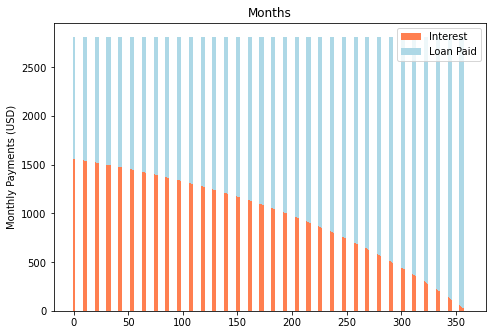

Monthly Paid : $2817.247752962191
Included Property Tax : $804.1666666666666
1st month Interest : $1562.5
Which is 55.46% of the payment!


In [7]:
#Result Visualizaion
ind = np.arange(n)  
width = 0.35
 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, mi, width, color='coral')
ax.bar(ind, lm, width,bottom=mi, color='lightblue')
ax.set_ylabel('Monthly Payments (USD)')
ax.set_title('Months')
ax.legend(labels=['Interest', 'Loan Paid'])
plt.show()

print("Monthly Paid : $" + str(mp))
print("Included Property Tax : $" + str(property_Tax/12))
print("1st month Interest : $" + str(mi[0]))
print("Which is " + str(round((mi[0]/mp)*100,2)) + "%" " of the payment!")